In [56]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline 

In [57]:
words= open('names.txt','r').read().split()
words

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [58]:
chars=sorted(set(list(''.join(words))))
stoi= {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}   
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [59]:
words [:1]

['emma']

In [60]:
'emma'

'emma'

In [61]:
#build the dataset
block_size=3 #context length
X,Y=[],[]


In [62]:
#build the dataset
block_size=4 #context length
X,Y=[],[]

for w in 'emma':
    print(w)
    context=[0]*block_size
    for ch in w+'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context= context[1:] + [ix] # crop and append
    

e
.... ---> e
...e ---> .
m
.... ---> m
...m ---> .
m
.... ---> m
...m ---> .
a
.... ---> a
...a ---> .


In [63]:
X

[[0, 0, 0, 0],
 [0, 0, 0, 5],
 [0, 0, 0, 0],
 [0, 0, 0, 13],
 [0, 0, 0, 0],
 [0, 0, 0, 13],
 [0, 0, 0, 0],
 [0, 0, 0, 1]]

In [64]:
Y

[5, 0, 13, 0, 13, 0, 1, 0]

In [65]:
context

[0, 0, 1, 0]

In [66]:
w+'.'

'a.'

In [67]:
stoi['e']
context=[0]*block_size
context

[0, 0, 0, 0]

In [68]:
ix=stoi['e']

In [69]:
X,Y=[],[]

In [70]:
X.append(context)

In [71]:
Y.append(ix)

In [72]:
Y

[5]

In [73]:
print(''.join(itos[i] for i in context), '--->', itos[ix])

.... ---> e


In [74]:
context=context[1:]+[ix]

In [75]:
ix=stoi['m']

In [76]:
X.append(context)

In [77]:
Y.append(ix)
Y

[5, 13]

In [78]:
print(''.join(itos[i] for i in context), '--->', itos[ix])

...e ---> m


In [79]:
context=context[1:]+[ix]
context

[0, 0, 5, 13]

In [80]:
X,Y=[],[]

print(w)
context=[0]*block_size
for ch in w+'.':
    ix=stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context= context[1:] + [ix] # crop and append


a
.... ---> a
...a ---> .


In [81]:
def build_dataset(words):    
    #build the dataset
    block_size=5 #context length
    X,Y=[],[]
    for w in words:

        context=[0]*block_size
        for ch in w+'.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context= context[1:] + [ix] # crop and append

    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))

X_train, y_train= build_dataset(words[:n1])
X_val,y_val= build_dataset(words[n1:n2])
X_test,y_test= build_dataset(words[n2:])

torch.Size([182625, 5]) torch.Size([182625])
torch.Size([22655, 5]) torch.Size([22655])
torch.Size([22866, 5]) torch.Size([22866])


In [82]:
#----------------- now made respectable --------------- 

In [83]:
g = torch.Generator().manual_seed(2147483647) #for reproducibility
C=torch.randn((27,10),generator=g)
W1=torch.randn((50,200),generator=g)
b1=torch.randn(200,generator=g)
W2=torch.randn((200,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [84]:
sum(p.nelement() for p in parameters) 

15897

In [85]:
for p in parameters:
    p.requires_grad=True

In [86]:
#lre=torch.linspace(-3,0,1000)
#lrs=10**lre

In [87]:
lri=[]
lossi=[]
stepi=[]

In [88]:
 emb= C[X_train[ix]]
 emb.shape

torch.Size([5, 10])

In [89]:

for i in range(200000):
    
    # Minibatch construct 
    ix=torch.randint(0,X_train.shape[0],(128,))
    # Forward Pass
    emb= C[X_train[ix]]
    h = torch.tanh(emb.view(-1,50) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss=- prob[torch.arange(32),Y].log().mean()
    loss=F.cross_entropy(logits,y_train[ix])
    print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    # update
    #lr=lrs[i]
    lr=0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr *p.grad

    # track stats
    stepi.append(i)
    #lri.append(lr)
    lossi.append(loss.log10().item())
#print(loss.item())

23.820919036865234
24.894207000732422
23.099157333374023
20.379838943481445
22.520694732666016
19.438329696655273
18.822978973388672
18.89546012878418
20.563913345336914
19.67830467224121
19.121335983276367
18.29994773864746
18.056671142578125
13.773048400878906
16.603851318359375
16.207971572875977
15.045870780944824
17.67763900756836
15.502891540527344
15.114272117614746
14.697218894958496
14.015629768371582
14.42102336883545
14.12024211883545
14.613977432250977
14.124991416931152
14.742206573486328
13.244673728942871
14.25515079498291
12.574241638183594
14.028690338134766
12.171262741088867
14.29942798614502
12.758601188659668
13.317974090576172
12.72846794128418
13.646768569946289
11.523504257202148
13.864771842956543
14.231629371643066
13.048829078674316
11.815949440002441
13.151901245117188
12.399636268615723
12.723908424377441
13.072607040405273
11.005219459533691
12.704824447631836
10.231139183044434
10.804211616516113
11.902433395385742
11.37590503692627
11.900167465209961
11.

KeyboardInterrupt: 

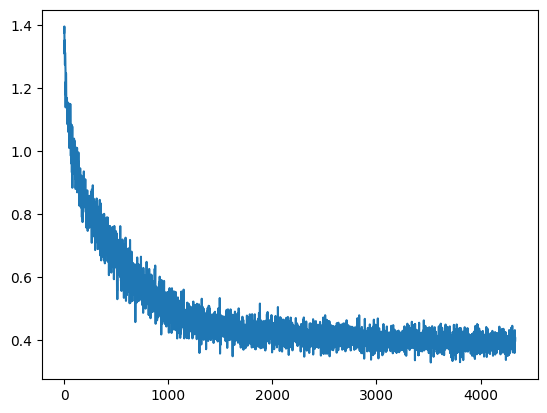

In [90]:
plt.plot(stepi,lossi)

In [91]:
emb= C[X_train]
h = torch.tanh(emb.view(-1,50) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss=F.cross_entropy(logits,y_train)
loss

tensor(2.4518, grad_fn=<NllLossBackward0>)

In [92]:
emb= C[X_val]
h = torch.tanh(emb.view(-1,50) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss=F.cross_entropy(logits,y_val)
loss

tensor(2.4559, grad_fn=<NllLossBackward0>)

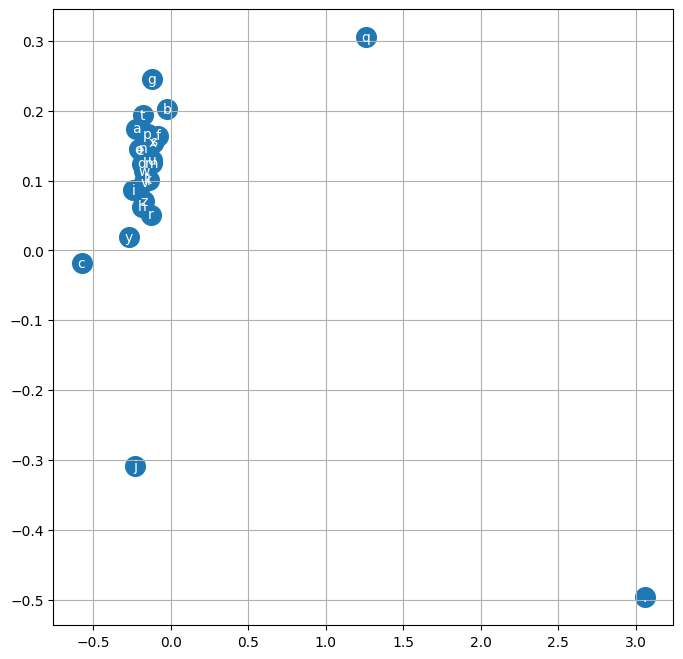

In [93]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(),itos[i],ha='center', va='center', color='white')
plt.grid('minor')

In [94]:
ix.shape

torch.Size([128])

In [95]:
ix

tensor([ 93610, 157410, 128536,  32197, 141572, 134541, 137310, 117949, 161234,
        162103, 177978, 103551, 153960, 154859,  32214,  86491,  24619,  37474,
         66897, 170586, 151375, 180933, 169145,  53342,  50175, 133448,  38079,
        181068,  34452, 175370,  99904,  63922,  76422, 170828, 113861,    743,
         30789, 150578,  19423,  75923,   2868, 156585,  16715, 181634, 127285,
        154515,  44837,  14776, 157494, 142446,  48122, 154019, 102874,  17745,
         56803,  83369, 174368, 113392,  13061,  37909, 174369,  12920, 152479,
         98754,  82962, 180893, 169779, 127578, 103197, 182489, 119067,  57941,
         81620,  54996,  55516, 153525,  41576,  98437, 115107, 131755,  53068,
        101785, 165928, 155081, 100935,  73523,  71242,  14505, 161359,  11867,
         38679,   2065, 159820,  66979,  61903,  87735,  81404,  16353, 158061,
        115723, 171873, 118074,  22246,  10009, 101066, 133103,  41037, 178051,
         16861, 130426, 103695, 124751, 

In [98]:
C[X].shape

torch.Size([4])

In [101]:
#sample form the model 
g=torch.Generator().manual_seed(2147483647)
block_size=5
for _ in range(20):
    out=[]
    context=[0]*block_size
    while True:
        emb=C[torch.tensor([context])]
        h=torch.tanh(emb.view(1,-1)@W1+b1)
        logits=h@W2+b2
        probs=F.softmax(logits,dim=1)
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i]for i in out))

junide.
janalie.
prefarie.
bransiinltolion.
juetendahnia.
zamileneai.
dedainr.
irelisniy.
evyla.
terinraumesinoltum.
revine.
jahosani.
coraay.
ehonah.
jaaenine.
korii.
wynil.
anaasnraviimons.
hhddion.
mitin.


In [102]:
ix=torch.multinomial(probs,num_samples=1,generator=g).item()
ix

9

In [103]:
probs

tensor([[2.9611e-01, 1.0526e-01, 1.0649e-03, 3.5208e-03, 2.3802e-02, 1.1242e-01,
         6.6852e-04, 6.9368e-04, 4.5849e-03, 1.1362e-01, 9.0640e-06, 3.9899e-03,
         5.3006e-02, 1.0842e-03, 8.3749e-02, 1.0756e-01, 1.3189e-04, 6.9186e-05,
         1.3450e-02, 6.3481e-03, 2.9302e-02, 3.8521e-03, 6.2848e-03, 6.1208e-04,
         6.3751e-05, 2.3178e-02, 5.5582e-03]], grad_fn=<SoftmaxBackward0>)

In [104]:
context=[0]*block_size
context

[0, 0, 0, 0, 0]

In [105]:
emb=C[torch.tensor([context])]
emb.shape

torch.Size([1, 5, 10])

In [106]:
C

tensor([[ 3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,  0.4882,
          0.2395,  1.9391],
        [-0.2211,  0.1742, -0.2819, -0.7629,  0.1181,  1.0315,  0.4699, -0.4923,
         -0.2471, -0.7160],
        [-0.0234,  0.2016, -0.4752, -0.6692,  0.0223,  0.8879,  0.4007, -0.1486,
         -0.1958, -0.5346],
        [-0.5748, -0.0178, -0.4298, -0.0806, -0.1889,  0.1853, -0.3512,  0.5174,
         -0.6366, -0.2189],
        [-0.1871,  0.1243, -0.2680, -0.7407, -0.0610,  0.7837,  0.3831, -0.2104,
         -0.2071, -0.4069],
        [-0.2002,  0.1435, -0.1766, -0.8584,  0.1117,  1.0206,  0.3668, -0.4251,
         -0.2781, -0.6750],
        [-0.0836,  0.1643, -0.3668, -0.7696,  0.0723,  0.8186,  0.3581, -0.0933,
         -0.1915, -0.3913],
        [-0.1207,  0.2447, -0.3226, -0.6041, -0.0137,  0.7881,  0.3756, -0.1668,
         -0.1371, -0.5040],
        [-0.1861,  0.0627, -0.3054, -0.8177,  0.0280,  0.7219,  0.3245, -0.3776,
         -0.1788, -0.4822],
        [-0.2409,  

In [107]:
emb=C[torch.tensor([context])]
emb

tensor([[[ 3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,
           0.4882,  0.2395,  1.9391],
         [ 3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,
           0.4882,  0.2395,  1.9391],
         [ 3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,
           0.4882,  0.2395,  1.9391],
         [ 3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,
           0.4882,  0.2395,  1.9391],
         [ 3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,
           0.4882,  0.2395,  1.9391]]], grad_fn=<IndexBackward0>)

In [108]:
emb.view(1,-1)

tensor([[ 3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,  0.4882,
          0.2395,  1.9391,  3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019,
         -2.2291,  0.4882,  0.2395,  1.9391,  3.0594, -0.4964,  0.0151, -2.8143,
          0.9544, -0.5019, -2.2291,  0.4882,  0.2395,  1.9391,  3.0594, -0.4964,
          0.0151, -2.8143,  0.9544, -0.5019, -2.2291,  0.4882,  0.2395,  1.9391,
          3.0594, -0.4964,  0.0151, -2.8143,  0.9544, -0.5019, -2.2291,  0.4882,
          0.2395,  1.9391]], grad_fn=<ViewBackward0>)